# Reading and Visualizing Different Raster Data Formats

### Raster Data
**Raster Data** represent objects/variables on the Earth's surface as a matrix of values, in the form of pixels, cells, or grids.

##### Layers and bands
A raster is an image with a matrix of some values representing the values of some observed attribute. Bands of a raster correspond to different variables, usually using the same matrix structure.

Example: Spatial variability of temperature, elevation, rainfall, etc. over a region.

A raster image can have multiple layers in to so all these different layers might represent different variables, so they may be image in different wavelength or might be a temperature or any other observed attribute at differet temporal information at a different temporal interval.

A raster image can have a single band or multiple bands altogether.
All these bands of an image may represent different information but all these layers will cover the same geographical extent. 

#### Raster Bands
Some rasters have a single band, of data, while others have multiple bands. Basically, a band is represented by a single matrix of cell values, and a raster with multiple bands contains multiple spatially coincident matrices of cell values representing the same spatial area.

Example: Digital Evaluation Model(DEM) is a single-band raster dataset. Each cell in a DEM contains only one value representing surface elevation.

i. **Single Band Raster**: A single-band raster can be of different types: _Binary image_ where every cell value can contain only two values either zeroes or ones, _Grayscale image_ where every cell or pixel might represent multiple grayscale levels, _Classified image_ that can be displayed using 'color map', where all cell values with a particular number represents a particular color.

ii. **Multi Band Raster**: A satellite image, for example, commonly has multiple bands representing different wavelengths from the ultravoilet through the visible and infrared portions of the electromagnetic spectrum.

### GDAL

* The **Geospatial Data Abstraction Library** is a translator library for raster and vector geospatial data formats.
* GDAL is a computer software library for reading and writing raster and vector geospatial data format.
* It presents a single raster abstract data model and single vector abstract data model to the calling application for all supported formats. 
* It also comes with a variety of useful command line utilities for data translation and processing.

* Free and Open-source
* Supports over 80+ iamges and map formats --> Supports almost all Raster as well as Vector formats available.

#### GDAL Raster Data Model

* A dataset (represented by the 'GDALDataset' class) is an assembly of related raster bands and some information common to them all.
* A dataset has a concept of the raster size (in pixels and lines).
* A dataset is also responsible for the georeferencing transform and coordinate system defition of all bands.
* A dataset itself can also have associated metadata, alist of name/value pairs in string form.

### Map Projection

A map projection is a way to flatten a earth's surface into a plane in order to make a map. This requires a systematic transformation of the latitudes & longitudes of locations from the surface of the globe into locations on a plane. All the projections of a sphere on a plane necessarily distort the surface in some way and to some extent.

### Coordinate System

There're numerous conventions used globally for representing the coordinate system for map data.

Dataset coordinate systems are represented as OpenGIS Well Known Text strings. 

This can contain:

* An overall coordinate system name.
* A geographic coordinate system name.
* A datum identifier.
* An ellipsoid name, semi-major axis, and inverse flattening.
* A prime meridian name and offset from Greenwich.
* A projection method type (i.e. Transverse Mercator).
* A list of projection parameters (i.e. central_meridian).
* A units name, and conversion factor to meters or radians.
* Names and ordering for the axes.
* Codes for most of the above in terms of predefined coordinate systems from authorities such as EPSG.

### Pixel Line to Real Coordinate

A geotransform is an affine transformation from the image coordinate space (row, column), also known as (pixel, line) to the georeferenced coordinate space (projected or geographic coordinates).

A Geotransform consists in a set of six coefficients :

1. GT(0)  x-coordinate of the upper-left corner of the upper-left pixel.
2. GT(1)  w-e pixel resolution / pixel width
3. GT(2)  row rotation (typically zero)
4. GT(3)  y-coordinate of the upper-left corner of the upper-left pixel
5. GT(4)  column rotation (typically zero)
6. GT(5)  n-s pixel resolution / pixel height (negative value for a north-up image)

### Tranformation from image coordinate space to georeferenced coordinate space

    X_geo = GT(0) + X_pixel * GT(1) + Y_line * GT(2)

    Y_geo = GT(3) + X_pixel * GT(4) + Y_line * GT(5)

GT(2), GT(4) coefficients are zero. 
G(1), GT(5) is the pixel size.
GT(0), GT(3) position is the top left corner of the top pixel of the raster.

## Reading Different Raster Data Formats

### Getting Raster Informtaion

In [1]:
# import necessary libraries

from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import os
from osgeo import osr
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML,display
from pprint import pprint

In [2]:
# os.chdr(r"directory/path")      
# use this for changing directories if needed

In [3]:
file_name = r"D:\New folder (4)\Geo-Processing using Py and ML\haridwar.tif"   # use tif image

In [4]:
raster_info = gdal.Info(file_name, format='json')     # fetch image's basic information

raster_info

{'description': 'D:\\New folder (4)\\Geo-Processing using Py and ML\\haridwar.tif',
 'driverShortName': 'GTiff',
 'driverLongName': 'GeoTIFF',
 'files': ['D:\\New folder (4)\\Geo-Processing using Py and ML\\haridwar.tif'],
 'size': [2000, 2000],
 'coordinateSystem': {'wkt': 'PROJCRS["WGS 84 / UTM zone 44N",\n    BASEGEOGCRS["WGS 84",\n        DATUM["World Geodetic System 1984",\n            ELLIPSOID["WGS 84",6378137,298.257223563,\n                LENGTHUNIT["metre",1]]],\n        PRIMEM["Greenwich",0,\n            ANGLEUNIT["degree",0.0174532925199433]],\n        ID["EPSG",4326]],\n    CONVERSION["UTM zone 44N",\n        METHOD["Transverse Mercator",\n            ID["EPSG",9807]],\n        PARAMETER["Latitude of natural origin",0,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EPSG",8801]],\n        PARAMETER["Longitude of natural origin",81,\n            ANGLEUNIT["degree",0.0174532925199433],\n            ID["EPSG",8802]],\n        PARAMETER["Scale factor at 

In [5]:
ds = gdal.Open(file_name)

ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001FC955831E0> >

##### Fetching basic information form the raster data

In [6]:
print('File list :', ds.GetFileList())

File list : ['D:\\New folder (4)\\Geo-Processing using Py and ML\\haridwar.tif']


In [7]:
print('Width :', ds.RasterXSize)

Width : 2000


In [8]:
print('Height :', ds.RasterYSize)

Height : 2000


In [9]:
print('Coordinate System :', ds.GetProjection())

Coordinate System : PROJCS["WGS 84 / UTM zone 44N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32644"]]


In [10]:
gt = ds.GetGeoTransform()

gt

(225478.94308370308, 5.0, 0.0, 3324407.5, 0.0, -5.0)

In [11]:
print("Origin : ", (gt[0], gt[3]))
print("Pixel Size : ", (gt[1], gt[5]))

Origin :  (225478.94308370308, 3324407.5)
Pixel Size :  (5.0, -5.0)


In [12]:
print('Upper Left Corner : ', gdal.ApplyGeoTransform(gt, 0, 0))
print('Upper Rightt Corner : ', gdal.ApplyGeoTransform(gt, ds.RasterXSize, 0))
print('Lower Left Corner : ', gdal.ApplyGeoTransform(gt, 0, ds.RasterYSize))
print('Lower Right Corner : ', gdal.ApplyGeoTransform(gt, ds.RasterXSize, ds.RasterYSize))
print('Upper Left Corner : ', gdal.ApplyGeoTransform(gt, ds.RasterXSize/2, ds.RasterYSize/2))

Upper Left Corner :  [225478.94308370308, 3324407.5]
Upper Rightt Corner :  [235478.94308370308, 3324407.5]
Lower Left Corner :  [225478.94308370308, 3314407.5]
Lower Right Corner :  [235478.94308370308, 3314407.5]
Upper Left Corner :  [230478.94308370308, 3319407.5]


In [13]:
print('Metadata : ', ds.GetMetadata())

Metadata :  {'AREA_OR_POINT': 'Area'}


In [14]:
# number of bands
print('Number of bands : ', ds.RasterCount)

Number of bands :  3


In [15]:
# individual bands of the image
for i in range(1, ds.RasterCount+1) :
    band = ds.GetRasterBand(i)     # in GDAL, bands are indexed starting at 1
    interp = band.GetColorInterpretation()
    interp_name = gdal.GetColorInterpretationName(interp)
    (w, h) = band.GetBlockSize()
    print('Band {0:d}, block size {1:d} {2:d}, color interp {3:s}'.format(i, w, h, interp_name))
    ovr_count = band.GetOverviewCount()
    print(f'\tNumber of overviews: {ovr_count}')
    for j in range(ovr_count) :
        ovr_band = band.GetOverview(j) # overview bands sarts at 0
        print('\t\tOverview %d: %dx%d' %(j, ovr_band.XSize, ovr_band.YSize))

Band 1, block size 2000 1, color interp Gray
	Number of overviews: 3
		Overview 0: 1000x1000
		Overview 1: 500x500
		Overview 2: 250x250
Band 2, block size 2000 1, color interp Undefined
	Number of overviews: 3
		Overview 0: 1000x1000
		Overview 1: 500x500
		Overview 2: 250x250
Band 3, block size 2000 1, color interp Undefined
	Number of overviews: 3
		Overview 0: 1000x1000
		Overview 1: 500x500
		Overview 2: 250x250


In [16]:
del ds

##### Visualizing the raster data

In [17]:
ds = gdal.Open(file_name)
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001FC95583D20> >

In [18]:
for i in range(1, ds.RasterCount+1) :
    band = ds.GetRasterBand(i)
    (minimum, maximum, mean, stddev) = band.ComputeStatistics(False)
    print('Band{:d}, min={:.3f}, max={:.3f}, mean={:3f}, stddev={:.3f}'.format(i, minimum, maximum, mean, stddev))

Band1, min=40.000, max=231.000, mean=58.319465, stddev=11.156
Band2, min=28.000, max=214.000, mean=48.770302, stddev=14.741
Band3, min=34.000, max=306.000, mean=99.982121, stddev=24.430


In [19]:
# fetch particular band from the dataset

band = ds.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000001FC95583750> >

In [20]:
# returns the band as a numpy array

data = band.ReadAsArray()
data

array([[51, 51, 52, ..., 59, 59, 58],
       [50, 52, 51, ..., 60, 60, 55],
       [50, 51, 50, ..., 63, 61, 58],
       ...,
       [69, 75, 80, ..., 49, 51, 49],
       [71, 76, 78, ..., 49, 50, 48],
       [73, 75, 77, ..., 47, 48, 51]], dtype=uint16)

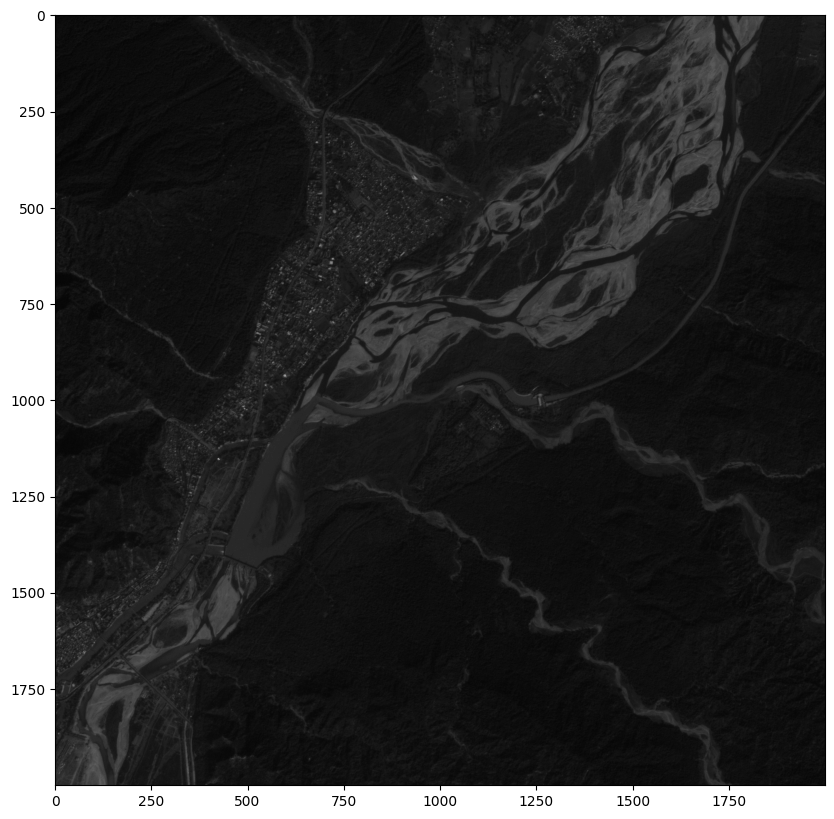

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray')

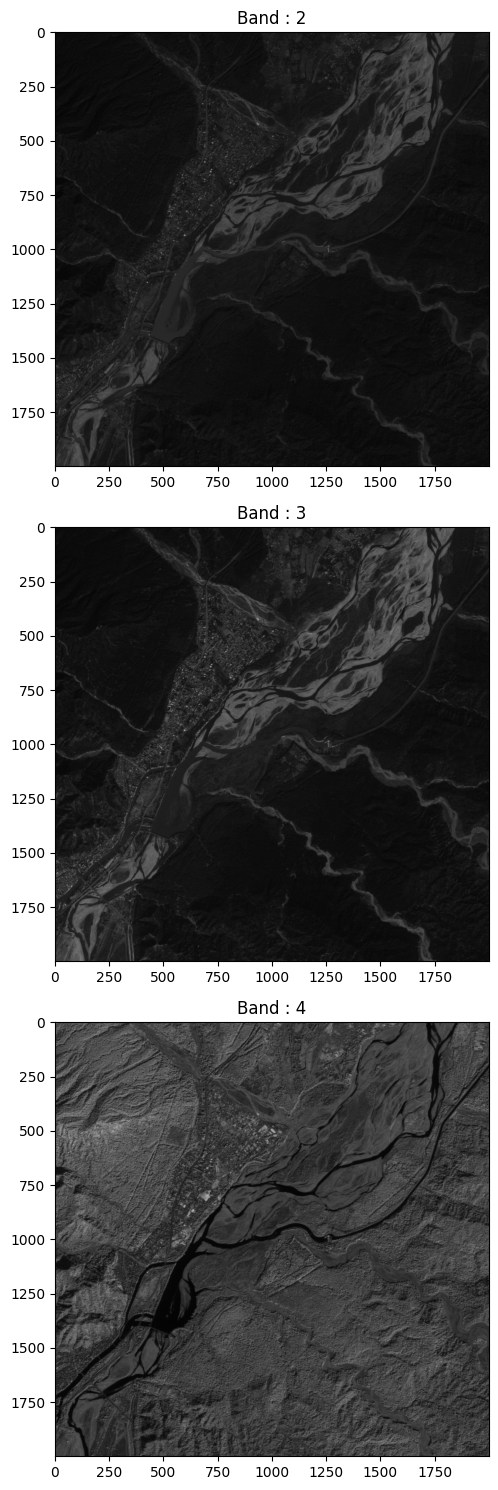

In [22]:
plt.figure(figsize=(10, 15))
for i in range(1, ds.RasterCount+1) :
    band = ds.GetRasterBand(i)
    plt.subplot(3, 1, i)
    plt.title('Band : '+str(i+1))
    plt.imshow(band.ReadAsArray(), cmap='gray')
    plt.tight_layout()

In [23]:
plt.close()

### Visualise MultiBand Raster

Though there're many possible combinations of wavelengths bands, the Earth Observatory typically selects combinations based on the event or feature we want to illustrate.

For instance, floods are best viewed in shortwave infrared, near infrared, and green light because muddy water blends with brown land in a natural color image.   
Shortwave infrared light highlights the difference between clouds, ice, and snow, all of which are in visible light.

#### False Color Composite

* Near infrared (red), gren (blue), red (green). This is a traditional band combination useful in seeing changes in plant health.
* Shortwave infrared (red), near infrared (green), and green (blue), often used to show floods or newly burned land.
* Blue (red), two different shortwave infrared bands (green and blue). It's used to differentiate between snow, ice, and clouds.
* Thermal infrared, usually shown in tones of gray to illustrate temperature.

##### Standard False Color Composites

The standard _false color composite_ is when we root nir to red, red to green, and green to blue channel.

* Near infrared (red), red (green), green (blue)

In [31]:
multi_data = ds.ReadAsArray(band_list=[3, 2, 1])

multi_data[0]

array([[158, 154, 152, ...,  99,  96,  96],
       [146, 143, 138, ...,  94,  90,  90],
       [142, 137, 126, ..., 103,  98,  95],
       ...,
       [130, 137, 126, ...,  78,  90, 112],
       [123, 128, 125, ...,  74,  82, 100],
       [121, 123, 123, ...,  76,  80,  93]], dtype=uint16)

In [33]:
multi_data.shape

(3, 2000, 2000)

In [34]:
multi_data = np.transpose(multi_data, axes = (1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [28..306].


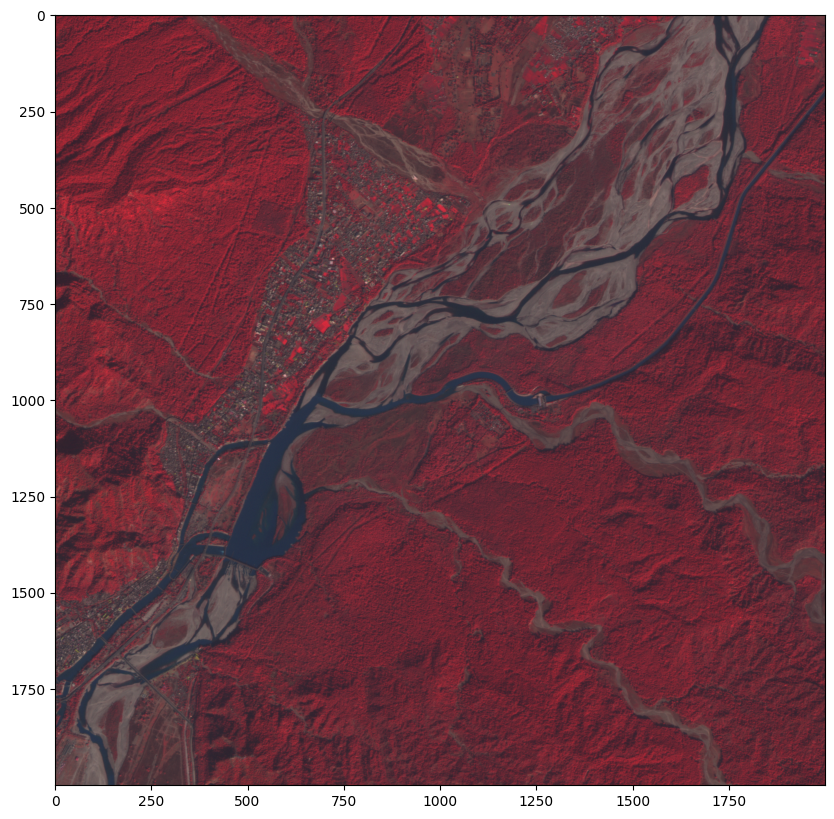

In [37]:
plt.figure(figsize=(10, 10))
plt.imshow(multi_data)

In this case, plants reflect near infrared and green light, while absorbing red.    
Since they reflect more near infrared than green, plant-covered land appears to be deep red.   
Cities and exposed ground are gray or tan, and clear water is black. This band combination is valuable for gauging plant health.

In [38]:
plt.close()

##### False Color Composites

* Shortwave infrared (red), near infrared (green), and green (blue)

In [39]:
multi_data = ds.ReadAsArray(band_list=[2, 3, 1])
multi_data = np.transpose(multi_data, axes = (1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [28..306].


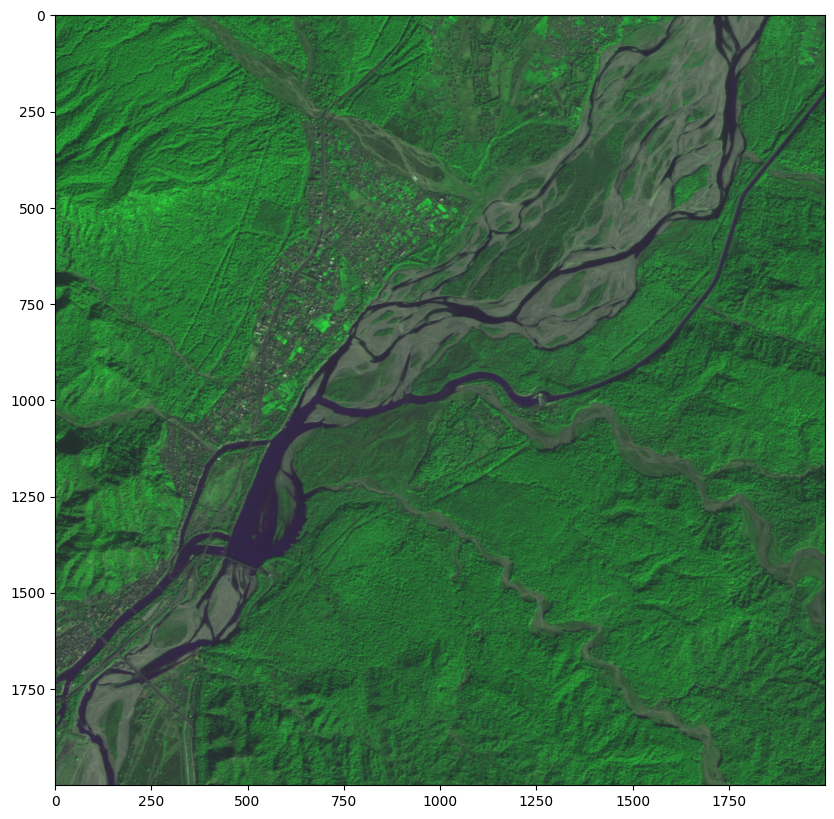

In [40]:
plt.figure(figsize=(10, 10))
plt.imshow(multi_data)

In [41]:
plt.close()

### Reading Partial Data set

In [42]:
band = ds.GetRasterBand(1)

data = band.ReadAsArray(xoff=600, yoff=600, win_xsize = 512, win_ysize=512)

data.shape

(512, 512)

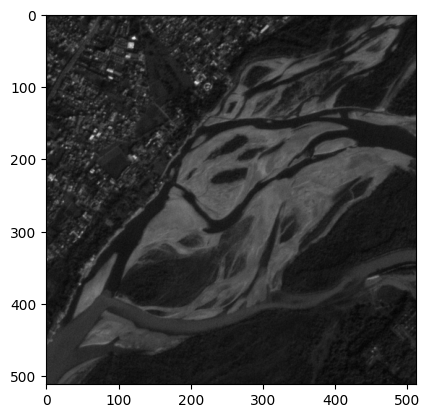

In [44]:
plt.imshow(data, cmap='gray') 

In [ ]:
del data
del ds

### Reading HDF Data 

Hierarchical Data Format (HDF) is a data file format designed by the National Center for Supercomputing Applications (NCSA) to assist users in the storage and manipulation of scientific data across diverse operating systems and machines.   
HDF5 file consist of a directory and a collection of data objects. Every data object has a directory entry, containing a pointer to the data object location, and information defining the data type.   

HDF supports a variety of data types: scientific data arrays, tables, and text annotations, as well as several types of raster images and their associated color palettes.

There're two distinct variables of HDF, known as HDF (version 4 and earlier) and the newer HDF5.

HDF files are also self-describing. For each data object in an HDF file, there are predefined tags that identify such information as the type of data, the amount of data, its dimensions, and its location in the file.    
The self-describing capability of HDF files has important implications for the processing scientific data. It makes it possible to fully understand the structure and contents of a file just from thr information stored in the file itself.

In [45]:
hdf_file = 'hdf-file-path'

In [ ]:
ds = gdal.Open(hdf_file)
ds

In [ ]:
sds = ds.GetSubDatasets()

In [ ]:
for sds_file, description in sds :
    print(description, sds_file)

In [ ]:
print(ds.GetMetadata())

In [ ]:
red_band = gdal.Open(sds[11][0]) 
green_band = gdal.Open(sds[14][0]) 
blue_band = gdal.Open(sds[13][0]) 

In [ ]:
pprint(red_band.GetMetadata())

In [ ]:
red_data = red_band.ReadAsArray() * 0.0001
blue_data = blue_band.ReadAsArray() * 0.0001
green_data = green_band.ReadAsArray() * 0.0001

In [ ]:
rgb_data = np.stack((red_data, green_data, blue_data), axis=-1)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(rgb_data)

### Reading netCDF Data

NetCDF (network Common Data Form) is a file format for storing multidimensional scientific data (variables) such as temperature, humidity, pressure, wind speed, and direction.   
each of these variables can be displayed through a dimension (such as time)

Data in netCDF form is :

- **Self Describing** : A netCDF file includes information about the data it contains.
- **Protable** : A netCDF file can be accessed by computers with different ways of storing integers, characters, and floatubg-point numbers.
- **Scalable** : Small subsets of large datasets in various format may be accessed efficiently through netCDF interfaces, even from remote servers.
- **Appendable** : Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
- **Sharable** : One writer and multiple readers may simultaneously access the same netCDF file.
- **Archivable** : Access to all earlier formss of netCDF data will be supported by current and future versions of the software.

In [ ]:
file_name = 'ncet-file-path'    # .nc

In [ ]:
info = gdal.Info(file_name, format='json')
info

In [ ]:
temp_info = gdal.Info('')
temp_info

In [ ]:
ds = gdal.OpenEx(file_name, gdal.OF_MULTIDIM_RASTER)

In [ ]:
rootGroup = ds.GetRootGroup()
rootGroup.GetMDArrayNames()

In [ ]:
temperature = rootGroup.OpenMDArray('t2')
data = temperature.ReadAsArray()

In [ ]:
data = data.squeeze() - 273

In [ ]:
fig = plt.figure(figsize=(20, 15))

for i in range(1, len(data)+1) :
    plt.subplots(5, 5, i)
    plt.title('Time: '+str(i))
    im = plt.imshow(data[i-1].squeeze(), origin='lower')
    plt.axis('off')

cbar = fig.colorbar(im, ax=fig.get_axes(), orientation='vertical', fraction=0.02, pad=0.04)
#plt.tight_layout()
plt.show()

In [ ]:
plt.close()

-----

In [ ]:
import os
from osgeo import gdal

In [ ]:
os.chdir('')

In [ ]:
ds = gdal.Open('BAND2.tif')

driver = gdal.GetDriverByName('gtiff')

h,w = ds.RasterYSize, ds.RasterXSize

In [ ]:
data = ds.ReadAsArray()
data.dtype

In [ ]:
dst_ds = driver.Create('./haridwar.tif', xsize=w, ysize=h, bands=3,eType=gdal.GDT_UInt16)

In [ ]:
dst_ds.SetProjection(ds.GetProjection())
dst_ds.SetGeoTransform(ds.GetGeoTransform())

for i in range(2, 5):
  #print(f'BAND{i-2}')
  dss = gdal.Open(f'BAND{i}.tif')
  dst_ds.GetRasterBand(i-1).WriteArray(dss.ReadAsArray())
  del dss

In [ ]:
dst_ds.BuildOverviews('AVERAGE', [2, 4, 8])

In [ ]:
dst_ds.FlushCache()

In [ ]:
del dst_ds